In [115]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree, ensemble, preprocessing
import pandas as pd


In [116]:
iris = load_iris()
hd = pd.read_csv("~\\OneDrive\\Documents\\GitHub\\machine-learning-applied-examples\\datasets\\processedcleveland.csv")

## IRIS

In [117]:
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf_iris_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=2)
clf_iris_gini = clf_iris_gini.fit(iris_train_x, iris_train_y)

clf_iris_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_iris_entropy = clf_iris_entropy.fit(iris_train_x, iris_train_y)

print(
    "Accuracy Gini: ", clf_iris_gini.score(iris_test_x, iris_test_y),
    "\nAccuracy Entropy: ", clf_iris_entropy.score(iris_test_x, iris_test_y)
)

# tree.plot_tree(clf_iris_gini)
# plt.show()

Accuracy Gini:  0.9666666666666667 
Accuracy Entropy:  0.9666666666666667


## Heart Disease

In [134]:
hd["num"] = hd["num"].apply(lambda x: 1 if x > 0 else 0)
hd_categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
hd_quantitative = hd.columns.difference(hd_categorical + ["num"])
hd[hd_categorical] = hd[hd_categorical].astype("int")

In [135]:
if hd.duplicated().any():
    hd = hd.drop_duplicates()
hd.duplicated().any()

False

In [136]:
hd_quantitative = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(hd_train[hd_quantitative])

hd_train_x = hd_train.drop("num", axis=1)
hd_train_y = hd_train["num"]
hd_test_x = hd_test.drop("num", axis=1)
hd_test_y = hd_test["num"]

hd_test_x.head()

hd_train_x[hd_quantitative] = scaler.transform(hd_train_x[hd_quantitative])
hd_test_x[hd_quantitative] = scaler.transform(hd_test_x[hd_quantitative])

# print(set(hd_test_y))

In [141]:
clf_1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_1 = clf_1.fit(hd_train_x, hd_train_y)
print("Accuracy: ", clf_1.score(hd_test_x, hd_test_y))

# tree.plot_tree(clf_1)
# plt.show()

Accuracy:  0.8666666666666667


In [142]:
best_max_depth = 1
best_n_estimators = 1
best_score = 0
best_criterion = "gini"
for criterion in ["gini", "entropy"]:
    print(criterion)
    for max_depth in range(1, 20):
        print(max_depth)
        for n_estimators in range(1, 50):
            clf = ensemble.RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)
            clf = clf.fit(hd_train_x, hd_train_y)
            score = clf.score(hd_test_x, hd_test_y)
            if score > best_score:
                best_score = score
                best_max_depth = max_depth
                best_n_estimators = n_estimators
                criterion = criterion
    print(criterion, best_score, best_max_depth, best_n_estimators)



gini
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
gini 0.9166666666666666 1 15
entropy
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
entropy 0.9166666666666666 1 15


In [151]:
print(criterion, best_score, best_max_depth, best_n_estimators)
clf = ensemble.RandomForestClassifier(criterion=criterion, n_estimators=best_n_estimators, max_depth=best_max_depth)
clf = clf.fit(hd_train_x, hd_train_y)
print(clf.feature_importances_)
print(hd_train_x.columns[clf.feature_importances_ > 0.1])

entropy 0.9166666666666666 1 15
[0.06666667 0.         0.2        0.         0.         0.
 0.         0.26666667 0.06666667 0.         0.2        0.06666667
 0.13333333]
Index(['cp', 'thalach', 'slope', 'thal'], dtype='object')


## Decision Tree Split Fun 
powered by gpt

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset with controlled labels
np.random.seed(42)
n_points_per_class_0 = 50
n_points_per_class_1 = 50

# Class 0
X_class0 = np.random.normal(loc=[0, 1], scale=0.1, size=(n_points_per_class_0, 2))
y_class0 = np.zeros(n_points_per_class_0, dtype=int)

X_class0 = np.vstack((X_class0, np.random.normal(loc=[2, 1], scale=0.1, size=(n_points_per_class_0, 2))))
y_class0 = np.hstack((y_class0, np.zeros(n_points_per_class_0, dtype=int)))

X_class0 = np.vstack((X_class0, np.random.normal(loc=[1, 1], scale=0.1, size=(n_points_per_class_0, 2))))
y_class0 = np.hstack((y_class0, np.zeros(n_points_per_class_0, dtype=int)))

# Class 1
X_class1 = np.random.normal(loc=[0.5, 1], scale=0.1, size=(n_points_per_class_1, 2))
y_class1 = np.ones(n_points_per_class_1, dtype=int)

X_class1 = np.vstack((X_class1, np.random.normal(loc=[1.5, 1], scale=0.1, size=(n_points_per_class_1, 2))))
y_class1 = np.hstack((y_class1, np.ones(n_points_per_class_1, dtype=int)))

# Combine the two classes
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

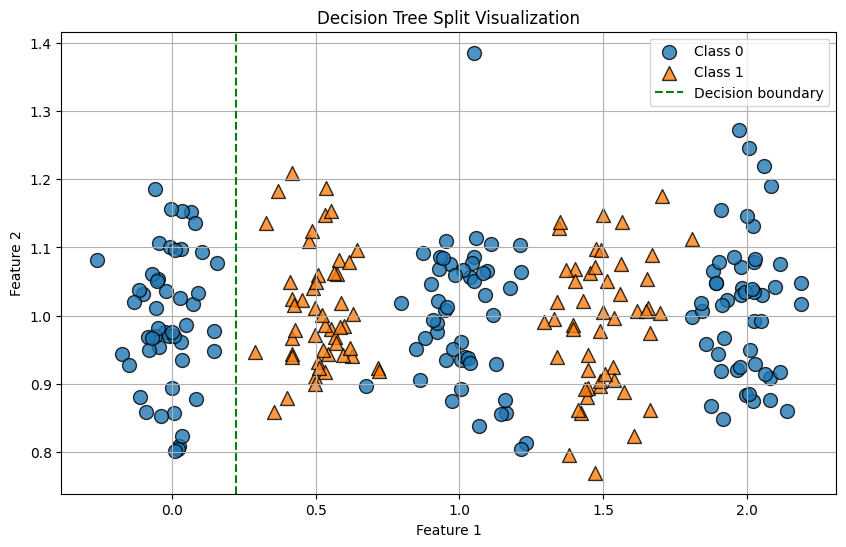

In [108]:


# Train a decision tree with one split
tree = DecisionTreeClassifier(max_depth=1, criterion='gini')  # Use 'entropy' for entropy
tree.fit(X, y)

# Retrieve split information
split_feature = tree.tree_.feature[0]
split_threshold = tree.tree_.threshold[0]

# Plot the data
plt.figure(figsize=(10, 6))
for label, marker, color in zip([0, 1], ['o', '^'], ['blue', 'red']):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}", 
                alpha=0.8, edgecolor='k', marker=marker, s=100)

# Plot the decision boundary
if split_feature == 0:  # Splitting on X[:, 0]
    plt.axvline(split_threshold, color='green', linestyle='--', label='Decision boundary')
else:  # Splitting on X[:, 1]
    plt.axhline(split_threshold, color='green', linestyle='--', label='Decision boundary')

# Add labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Split Visualization")
plt.legend()
plt.grid(True)
plt.show()


Accuracy Gini:  0.6333333333333333 
Accuracy Entropy:  0.6333333333333333


NameError: name 'plt' is not defined

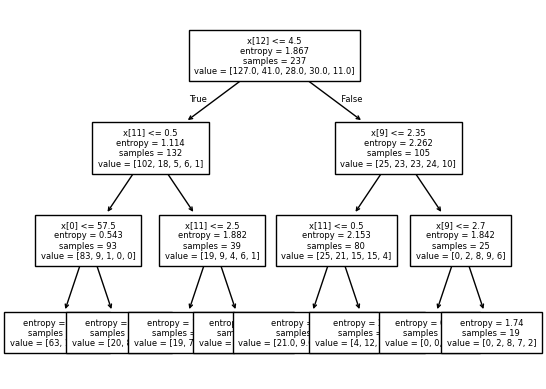

In [ ]:
tree.plot_tree(clf_gini, fontsize=6)
plt.show()